In [2]:
# The media types dataset
import pandas as pd
df_media = pd.read_csv('all_parties_media_types.csv')
df_media

,Media Type,Post Date,Political Party
0,GraphImage,2024-03-08 23:59:01,PS
1,GraphVideo,2024-03-08 23:36:30,PS
2,GraphVideo,2024-03-08 23:01:58,PS
3,GraphSidecar,2024-03-08 22:36:24,PS
4,GraphSidecar,2024-03-08 22:01:47,PS
...,...,...,...
2096,GraphImage,2024-01-15 09:32:19,PAN
2097,GraphSidecar,2024-01-13 21:10:23,PAN
2098,GraphImage,2024-01-12 18:23:34,PAN
2099,GraphImage,2024-01-11 19:29:52,PAN


In [3]:
# The likes datset
import pandas as pd
df_likes = pd.read_csv('all_parties_likes.csv')
df_likes

,Post Number,Likes,Political Party
0,1,2438,PS
1,2,1663,PS
2,3,1339,PS
3,4,1673,PS
4,5,1167,PS
...,...,...,...
2096,106,407,PAN
2097,107,581,PAN
2098,108,1458,PAN
2099,109,119,PAN


In [4]:
import pandas as pd

csv_files = [
    "media_types_of_PS.csv",
    "media_types_of_AD.csv",
    "media_types_of_CH.csv",
    "media_types_of_IL.csv",
    "media_types_of_B.E..csv",
    "media_types_of_PCP.csv",
    "media_types_of_L.csv",
    "media_types_of_PAN.csv"
]

# Initialize an empty list to store the dataframes
dfs = []

# Define a dictionary to map the abbreviations to full names
party_names = {
    "PS": "PS",
    "AD": "PPD/PSD.CDS-PP.PPM",
    "CH": "CH",
    "IL": "IL",
    "B": "B.E.",
    "PCP": "PCP",
    "L": "L",
    "PAN": "PAN"
}

# Loop through each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    
    df['Post Number'] = range(1, len(df) + 1)    # Add a new column 'Post Number'
    
    party = file.split('_of_')[-1].split('.')[0]  # Extract the political party abbreviation from the filename
    
    # Replace the abbreviation with the full party name
    party_full_name = party_names.get(party, party)
    
    df['Political Party'] = party_full_name   # Add the political party as a column
    
    dfs.append(df)   # Append the modified dataframe to the list

# Concatenate all the dataframes in the list into one
df_media = pd.concat(dfs, ignore_index=True)

# Save the merged dataframe to a CSV file
df_media.to_csv('all_parties_media_types_with_post_number.csv', index=False)

In [5]:
import pandas as pd

# Merge the datasets on 'Post Number' and 'Political Party'
df_merged = pd.merge(df_likes, df_media, on=['Post Number', 'Political Party'])

# Calculate the mean likes for each media type
mean_likes_by_media = df_merged.groupby('Media Type')['Likes'].mean().reset_index()

# Sort from the highest to lowest
mean_likes_by_media = mean_likes_by_media.sort_values(by='Likes', ascending=False)

print(mean_likes_by_media)

     Media Type        Likes
2    GraphVideo  3016.476813
0    GraphImage  2556.452342
1  GraphSidecar  1259.714509


In [6]:
df_merged

,Post Number,Likes,Political Party,Media Type,Post Date
0,1,2438,PS,GraphImage,2024-03-08 23:59:01
1,2,1663,PS,GraphVideo,2024-03-08 23:36:30
2,3,1339,PS,GraphVideo,2024-03-08 23:01:58
3,4,1673,PS,GraphSidecar,2024-03-08 22:36:24
4,5,1167,PS,GraphSidecar,2024-03-08 22:01:47
...,...,...,...,...,...
2096,106,407,PAN,GraphImage,2024-01-15 09:32:19
2097,107,581,PAN,GraphSidecar,2024-01-13 21:10:23
2098,108,1458,PAN,GraphImage,2024-01-12 18:23:34
2099,109,119,PAN,GraphImage,2024-01-11 19:29:52


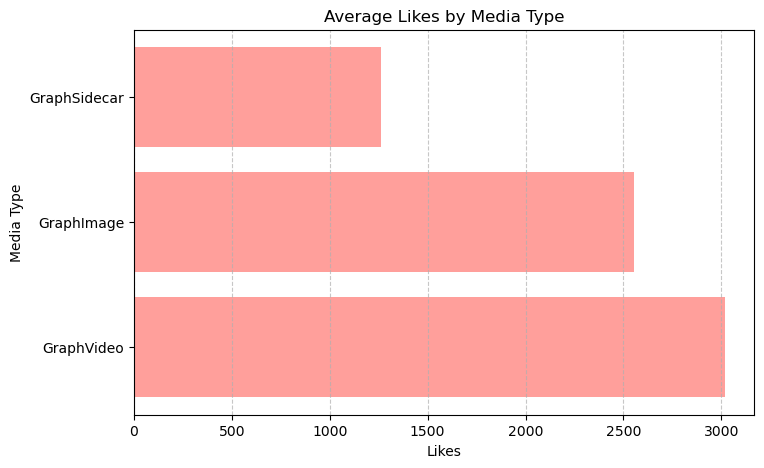

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pastel_color = sns.color_palette('pastel')[3]

# Plot a bar graph
plt.figure(figsize=(8, 5))
plt.barh(mean_likes_by_media['Media Type'], mean_likes_by_media['Likes'], color=pastel_color)
plt.xlabel('Likes')
plt.ylabel('Media Type')
plt.title('Average Likes by Media Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()